**Installing and Importing Dependencies**

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 3.

In [2]:
!pip install transformers pandas numpy

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**Instantiating Model**

In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

**Encoding and Calculating Sentiments with positive and negative comments**

In [5]:
tokens = tokenizer.encode('I love love! I highly recommend', return_tensors='pt')

In [6]:
result = model(tokens)

In [7]:
result.logits #the score represents the possible position of the sentiment

tensor([[-2.4476, -2.8800, -1.6024,  1.3887,  4.4706]],
       grad_fn=<AddmmBackward0>)

In [8]:
int(torch.argmax(result.logits))+1 #to obtain an integer of the score

5

In [9]:
tokens = tokenizer.encode('This is about the worst ever!', return_tensors='pt')

In [10]:
result = model(tokens)

In [11]:
result.logits

tensor([[ 4.5464,  1.4924, -0.7676, -2.8364, -1.7956]],
       grad_fn=<AddmmBackward0>)

In [12]:
int(torch.argmax(result.logits))+1

1

**Loading the dataset into DataFrame and EDA**

In [13]:
from google.colab import drive # mounting the drive to load the dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/amazon_reviews.csv')
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [15]:
data['overall'] = data['overall'].astype(int) # to change the float in overall column to integer
data = data[['overall', 'reviewText']] # extracting the two columns required
data.head()

,overall,reviewText
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."


In [16]:
data.tail()

,overall,reviewText
4910,1,I bought this Sandisk 16GB Class 10 to use wit...
4911,5,Used this for extending the capabilities of my...
4912,5,Great card that is very fast and reliable. It ...
4913,5,Good amount of space for the stuff I want to d...
4914,5,I've heard bad things about this 64gb Micro SD...


In [17]:
data.shape

(4915, 2)

In [18]:
any_null = data.isnull().values.any() #checking for any null values
any_null

True

In [19]:
null_count = data.isnull().sum()
null_count

overall       0
reviewText    1
dtype: int64

In [20]:
# Filling the null value with an empty string
data['reviewText'] = data['reviewText'].fillna('')

In [21]:
# confiming null value is filled
null_count = data.isnull().sum()
null_count

overall       0
reviewText    0
dtype: int64

In [22]:
# the distribution of the categories
data['overall'].value_counts()

overall
5    3922
4     527
1     244
3     142
2      80
Name: count, dtype: int64

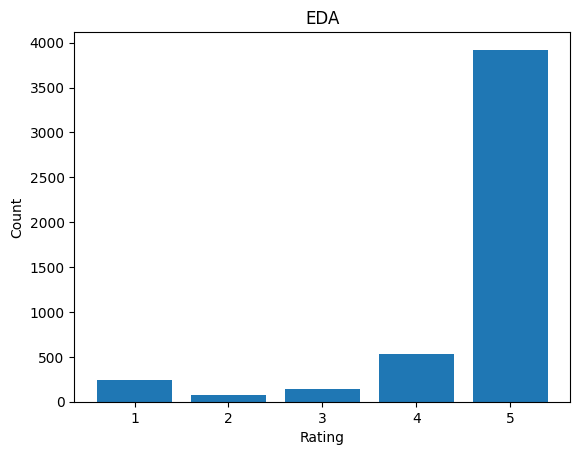

In [23]:
# simple EDA of the dataset
sentiment_counts = data['overall'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('EDA')
plt.show()

**Scoring the Model**

In [24]:
# a function to score the sentiment of the review text
def sentiment_score(reviewText):
    tokens = tokenizer.encode(reviewText, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [25]:
sentiment_score(data['reviewText'].iloc[0]) # sample check of the score function on a first review

4

In [26]:
data['sentiment'] = data['reviewText'].apply(lambda x: sentiment_score(x[:512])) # model looping through each review to produce a score

In [27]:
data

,overall,reviewText,sentiment
0,4,No issues.,4
1,5,"Purchased this for my device, it worked as adv...",5
2,4,it works as expected. I should have sprung for...,3
3,5,This think has worked out great.Had a diff. br...,1
4,5,"Bought it with Retail Packaging, arrived legit...",5
...,...,...,...
4910,1,I bought this Sandisk 16GB Class 10 to use wit...,1
4911,5,Used this for extending the capabilities of my...,5
4912,5,Great card that is very fast and reliable. It ...,5
4913,5,Good amount of space for the stuff I want to d...,4


In [28]:
# Calculating accuracy of model
accuracy = accuracy_score(data['overall'], data['sentiment'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.6824008138351983


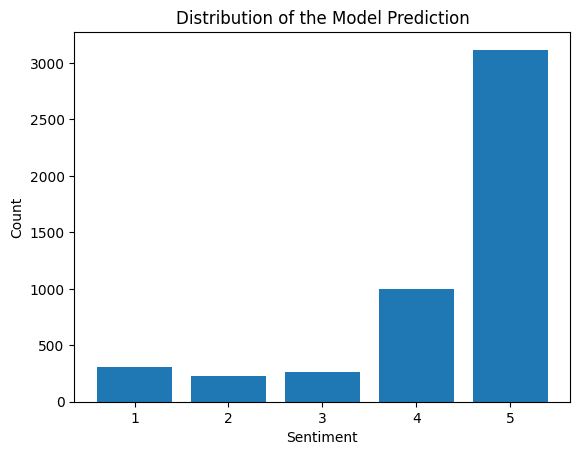

In [29]:
# Predicted rating distribution
sentiment_counts = data['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of the Model Prediction')
plt.show()

**Further Comparison**

In [30]:
# the distribution of categories of the predicted customer rating
data['sentiment'].value_counts()

sentiment
5    3117
4     998
1     308
3     265
2     227
Name: count, dtype: int64

In [31]:
# the distribution of categories of the actual customer rating
data['overall'].value_counts()

overall
5    3922
4     527
1     244
3     142
2      80
Name: count, dtype: int64

In [32]:
# converting the ratings to positive, negative and neutral sentiments
def rating(row):

    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [33]:
data['overall'] = data.apply(rating, axis=1)
data['overall'].value_counts()

overall
Positive    4449
Negative     324
Neutral      142
Name: count, dtype: int64

In [34]:
def sentiments(row):

    if row['sentiment'] == 3.0:
        val = 'Neutral'
    elif row['sentiment'] == 1.0 or row['sentiment'] == 2.0:
        val = 'Negative'
    elif row['sentiment'] == 4.0 or row['sentiment'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [35]:
data['sentiment'] = data.apply(sentiments, axis=1)
data['sentiment'].value_counts()

sentiment
Positive    4115
Negative     535
Neutral      265
Name: count, dtype: int64